In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
os.chdir('SG Codebooks')

In [3]:
df_mt1 = pd.read_excel(r'./Message Testing R1/SG19_SG19_v2_open_ends.xlsx')

In [4]:
df_mt1.head(10)

,ResponseID,wts,demo_group,demo,question,text
0,R_DvNO7doGvwVZu6d,0.841371,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,Tickets
1,R_3HLqseLkwwzUCm5,0.850513,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,The claim of offering the best seats at the be...
2,R_2y8U1s7EF6uDglk,1.176397,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,statements
3,R_2VIQrr848hugj4L,0.280698,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,the price you see is the price you get
4,R_33qcqyFGq41StyT,0.449103,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,Great service
5,R_1gCJAEW7SBGwvD7,1.663112,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,I have used this app a few times
6,R_3NJvhAyW3n6Nrvt,0.519492,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,I like the price you see is the price you pay
7,R_3smQe64Xcci53HA,0.840270,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,Nothing much.
8,R_O7HXhru5xiDFeuZ,0.806627,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,Statement seem to make a point or peak your cu...
9,R_2Ed6tb3U3lhxKIH,0.711809,SG_RAND1,"We know what fans want. After all, we’re fans,...",SG19,Don’t know


In [75]:
df_mt1 = df_mt1.dropna()

In [76]:
demos = df_mt1.demo.unique()

In [77]:
demos

array(['We know what fans want. After all, we’re fans, too.',
       'The ticketing app for fans, by fans.',
       'Score the best deals to the events you love.',
       'Get the best value on the best seats in the house. Guaranteed.',
       'More innovative technology for a more intuitive platform.',
       'We’re changing the ticketing game for the better.',
       'Know exactly what you’re paying for and why.',
       'The prices you see are the prices you get.'], dtype=object)

In [78]:
def wordimage(df, title, column='text'):
    long_string = ','.join(list(df[column].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=50, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    print(title)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

We know what fans want. After all, we’re fans, too.


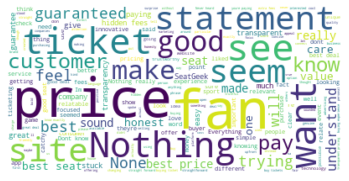

The ticketing app for fans, by fans.


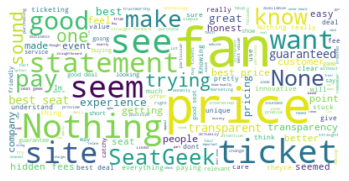

Score the best deals to the events you love.


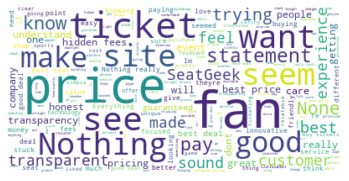

Get the best value on the best seats in the house. Guaranteed.


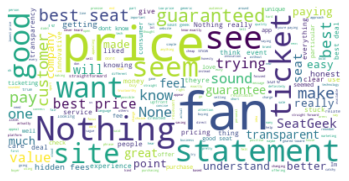

More innovative technology for a more intuitive platform.


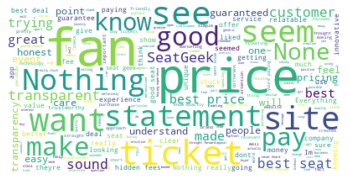

We’re changing the ticketing game for the better.


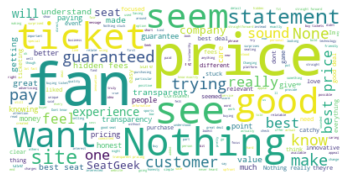

Know exactly what you’re paying for and why.


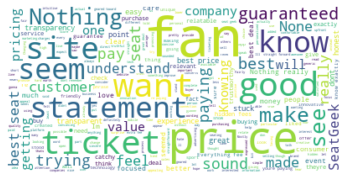

The prices you see are the prices you get.


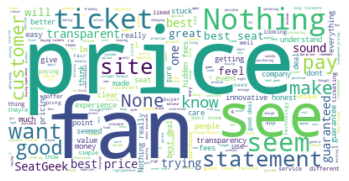

In [79]:
for demo in demos:
    df = df_mt1.loc[df_mt1['demo'] == demo]
    wc = wordimage(df, demo)
    #plt.plot(img)

In [80]:
sns.set_style('whitegrid')
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

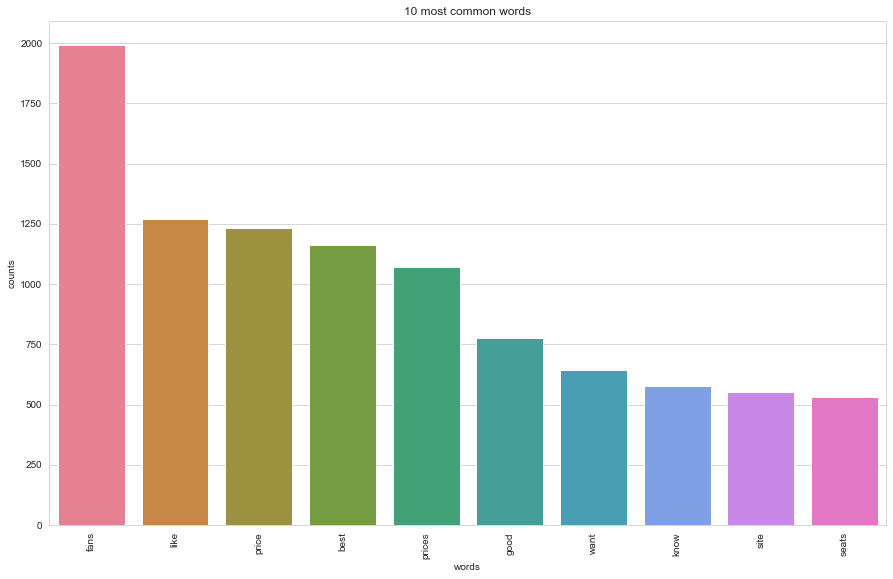

In [81]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_mt1['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [92]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


/Users/juersong/miniconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Topics found via LDA:

Topic #0:
like trying site seatgeek sounds just good tickets theyre think

Topic #1:
best seats transparency deals good value prices transparent pricing want

Topic #2:
dont straight statements know stuck forward fan particular catchy straightforward

Topic #3:
customer great statements use service site ticket like company seatgeek

Topic #4:
guaranteed feel better like experience clear prices relevant make statements

Topic #5:
really good statement ones seat stuck different statements geek guaranteed

Topic #6:
point innovative like unique good people attention fair short deal

Topic #7:
want know paying like tickets understand getting exactly knowing easy

Topic #8:
fans prices honest sure like site great ticket transparent app

Topic #9:
price pay fees hidden prices like guarantee ticket charges knowing


value_props


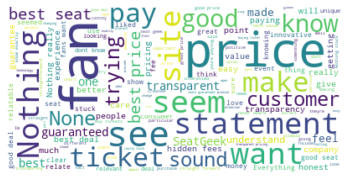

In [95]:
wordimage(df_mt1, 'value_props', column='text')